# ROC curve For Binary Classification using matplotlib

In [1]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load Breast Cancer Dataset

In [2]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

In [8]:
X.shape

(569, 30)

In [13]:
y.shape

(569,)

# Split the Dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

# Model

In [21]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Accuracy

In [18]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))


Accuracy 0.9521276595744681


In [41]:
import pandas as pd
pd.DataFrame({'prob_0': clf.predict_proba(X_test)[:, 0], 
              'prob_1': clf.predict_proba(X_test)[:, 1], 
              'pred_class': clf.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.966405,3.359487e-02,0
1,1.000000,3.703919e-07,0
2,0.079067,9.209325e-01,1
3,1.000000,4.076054e-08,0
4,0.439879,5.601211e-01,1
5,0.283897,7.161028e-01,1
6,0.003330,9.966704e-01,1
7,0.174989,8.250114e-01,1
8,0.978570,2.143027e-02,0
9,0.005367,9.946330e-01,1


# ROC Curve

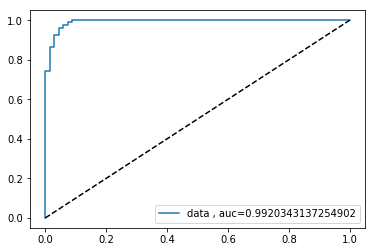

In [47]:
y_pred_proba = clf.predict_proba(X_test)[:,1] # czyli wybór kolumny danych z prob_1
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.show()